In [88]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

In [89]:
# df = pd.read_csv('hotData.csv')
# df = pd.read_csv('hotoutliers.csv')
df = pd.read_csv('feature-outliers.csv')

In [90]:
df.columns

Index(['goals', 'xg', 'crosses', 'boxtouches', 'passes', 'progpasses',
       'takeons', 'progruns', 'tackles', 'interceptions', 'clearances',
       'blocks', 'aerials', 'fouls', 'fouled', 'nsxg', 'results', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', 'int',
       'bl_fl', 'gl_fl', 'pr_in', 'tkl_tk'],
      dtype='object')

In [91]:
#x_values
X=df.drop(columns=['results'])

In [92]:
X.head()

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,...,69,70,71,72,73,int,bl_fl,gl_fl,pr_in,tkl_tk
0,-0.247692,-0.058462,0.023077,-0.005385,-0.083077,-0.176154,0.573846,-0.158462,-0.038462,-0.166923,...,0.0,0.0,0.0,0.0,0.0,-0.022212,-0.203347,0.073736,0.026451,-0.022071
1,0.055385,0.266154,0.076923,0.214615,0.210000,0.326923,-0.112308,0.261538,0.226923,0.198462,...,0.0,0.0,0.0,0.0,0.0,-0.000863,-0.274346,-0.020705,0.051905,-0.025485
2,0.781538,0.256154,0.016923,0.298462,-0.303077,-0.243846,0.117692,0.115385,-0.035385,-0.245385,...,0.0,0.0,1.0,0.0,0.0,0.147478,-0.019921,0.326443,-0.028314,-0.004164
3,0.472308,0.458462,-0.023846,0.078462,0.416923,0.273846,0.693077,0.513077,0.130000,0.178462,...,0.0,0.0,1.0,0.0,0.0,0.241512,0.009974,0.218715,0.091564,0.090100
4,0.095385,0.250769,0.246923,0.118462,0.100000,0.000769,0.095385,0.163846,0.410000,0.266923,...,0.0,0.0,0.0,0.0,0.0,0.005128,-0.018551,0.007851,0.043734,0.039108


In [93]:
#y_value
Y=df['results']

In [84]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

In [86]:
main_x = X.iloc[:, :16 ]and X.iloc[]

In [87]:
main_x

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,0
0,-0.247692,-0.058462,0.023077,-0.005385,-0.083077,-0.176154,0.573846,-0.158462,-0.038462,-0.166923,-0.096923,0.683077,-0.409231,-0.192308,-0.297692,0.074615,0.0
1,0.055385,0.266154,0.076923,0.214615,0.210000,0.326923,-0.112308,0.261538,0.226923,0.198462,-0.106923,0.733846,0.142308,-0.063077,-0.373846,0.002308,0.0
2,0.781538,0.256154,0.016923,0.298462,-0.303077,-0.243846,0.117692,0.115385,-0.035385,-0.245385,-0.143077,-0.047692,-0.237692,0.343846,0.417692,0.353077,0.0
3,0.472308,0.458462,-0.023846,0.078462,0.416923,0.273846,0.693077,0.513077,0.130000,0.178462,-0.239231,0.021538,-0.318462,0.204615,0.463077,0.521538,0.0
4,0.095385,0.250769,0.246923,0.118462,0.100000,0.000769,0.095385,0.163846,0.410000,0.266923,-0.184615,-0.225385,0.149231,0.034615,0.082308,0.062308,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.114615,0.155385,0.271538,0.330769,-0.015385,0.028462,0.128462,0.109231,0.130769,0.056923,-0.232308,-0.146923,-0.023077,0.078462,0.532308,0.140769,0.0
256,-0.093077,-0.197692,-0.366923,-0.434615,0.531538,0.181538,-0.248462,-0.085385,0.169231,0.879231,-0.082308,0.463077,-0.289231,0.077692,0.267692,-0.443077,0.0
257,0.689231,0.773846,-0.020769,0.551538,-0.054615,-0.101538,-0.112308,-0.080000,0.333077,0.871538,-0.318462,0.173077,0.363846,-0.326923,-0.166923,0.448462,0.0
258,0.243846,0.064615,0.097692,0.312308,0.330769,0.399231,0.216154,-0.051538,0.349231,0.529231,0.266923,0.176154,-0.012308,0.509231,-0.030769,0.190000,0.0


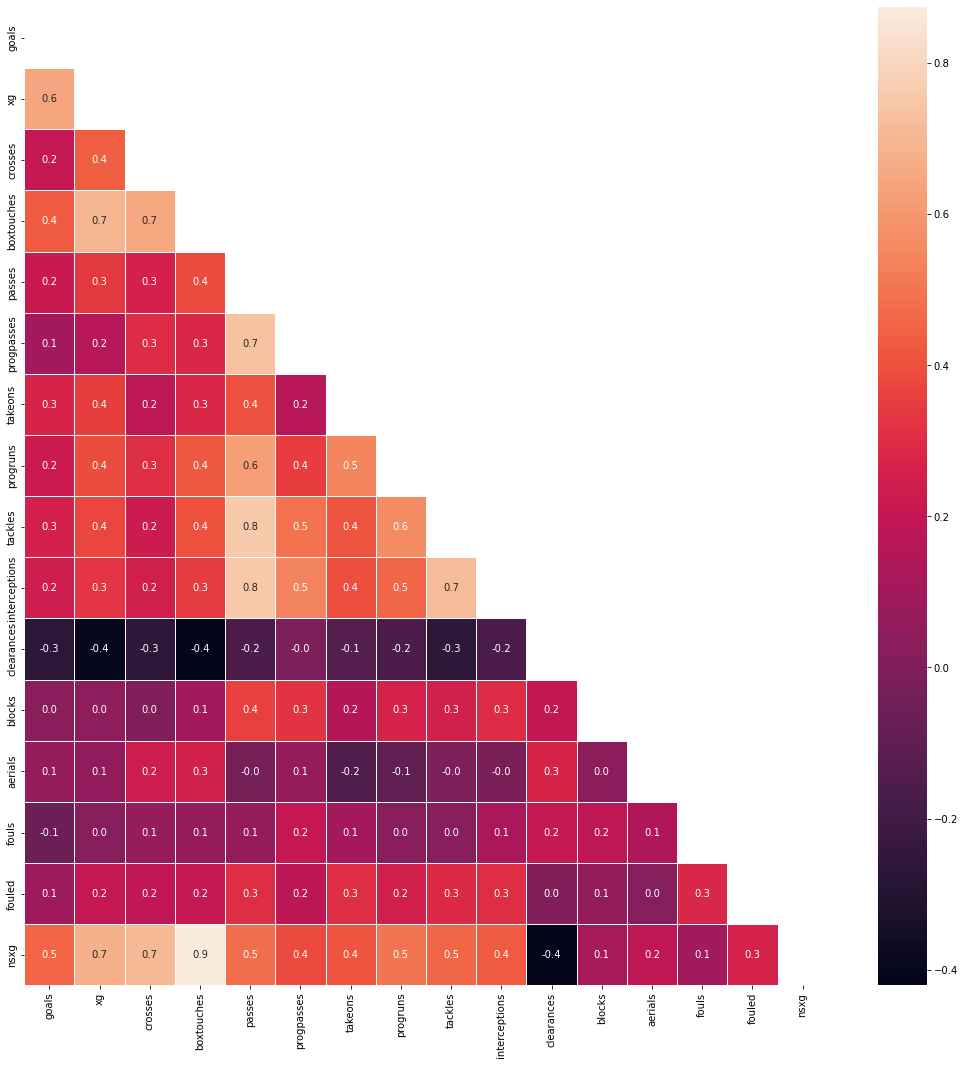

In [76]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(main_x.corr())
se.heatmap(main_x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [44]:
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

In [45]:
model = RandomForestRegressor(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [46]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 18.94 %



In [67]:
y_pred=model.predict(X_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

R2 Score: 18.94 %
Mean Absolute Error 5.59
Mean Squared Error 57.87
MAPE: 0.8562981135403892


(-1.0, 90.0)

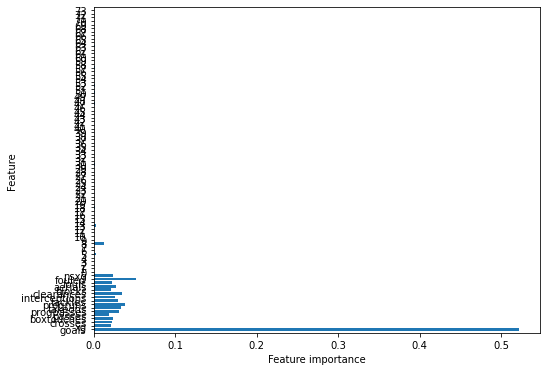

In [56]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

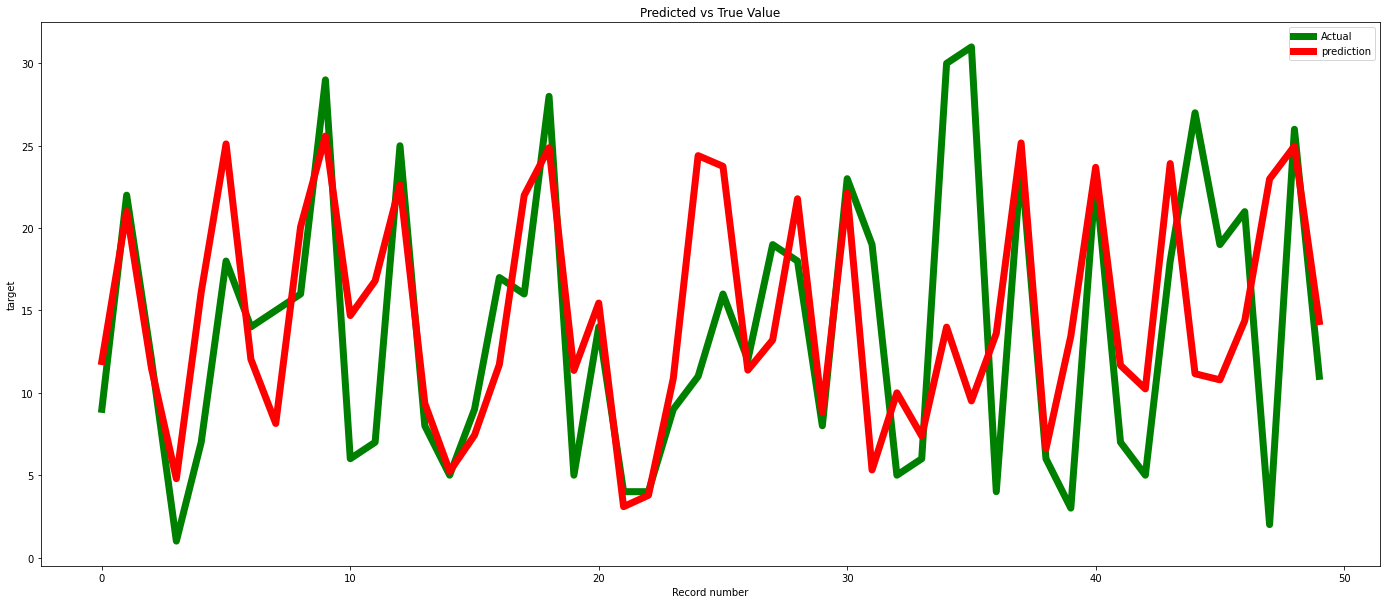

In [66]:
plt.figure(figsize=(24,10))
plt.plot(range(50),y_test[0:50], color = "green", linewidth=7, markersize=12)
plt.plot(range(50),model.predict(X_test[0:50]), color = "red", linewidth=7, markersize=12)
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel("target")
plt.show()